#  Exploratory Data Analysis

# Prepings

## Importing packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the data

In [6]:

# Define file paths
ratings_file = '/Users/femke/Documents/Uni/DSS/Thesis/Data/ml-1m/ratings.dat'
users_file = '/Users/femke/Documents/Uni/DSS/Thesis/Data/ml-1m/users.dat'
movies_file = '/Users/femke/Documents/Uni/DSS/Thesis/Data/ml-1m/movies.dat'

# Load datasets
ratings = pd.read_csv(ratings_file, sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
users = pd.read_csv(users_file, sep='::', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
movies = pd.read_csv(movies_file, sep='::', header=None, names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')

# Display the first few rows of each DataFrame
print(ratings.head(5))
print(users.head(5))
print(movies.head(5))

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


## basic info

In [7]:
# Ratings DataFrame
print(ratings.info())
print(ratings.describe())

# Users DataFrame
print(users.info())
print(users.describe())

# Movies DataFrame
print(movies.info())
print(movies.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09
<class 'pandas.core.frame.DataFrame'>
RangeInd

## Merging and saving the data

In [18]:
ratings_plus_users = pd.merge(ratings, users, on='UserID')

# Merge the result with movies
df = pd.merge(ratings_plus_users, movies, on='MovieID')

# Display the first few rows of the merged DataFrame
print(df.head())

df.to_csv('/Users/femke/Documents/Uni/DSS/Thesis/Data/merged_movielens_1m__data.csv', index=False)


   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       2     1193       5  978298413      M   56          16    70072   
2      12     1193       4  978220179      M   25          12    32793   
3      15     1193       4  978199279      M   25           7    22903   
4      17     1193       5  978158471      M   50           1    95350   

                                    Title Genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  


# EDA

## Distribution of rating and interesting features

In [20]:
print(df.dtypes)

UserID         int64
MovieID        int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
Title         object
Genres        object
dtype: object


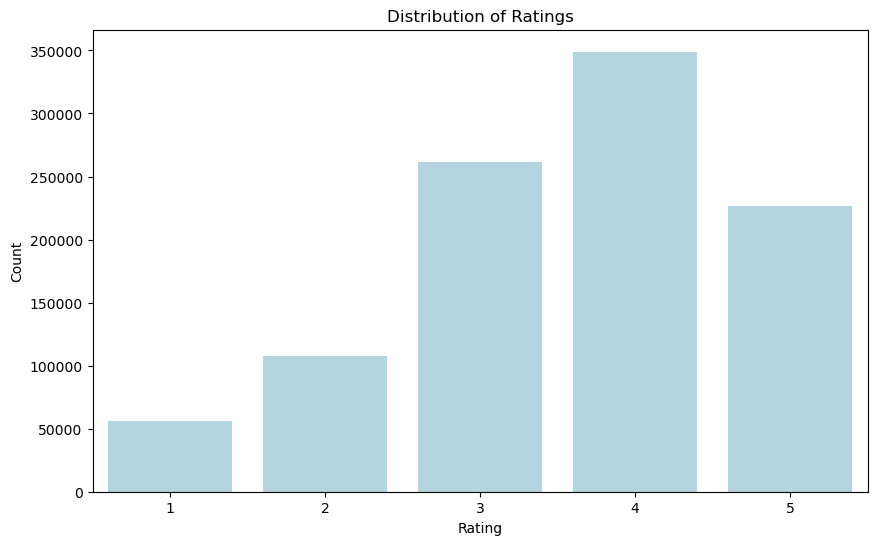

In [24]:
# Plot the distribution of ratings
def plot_rating_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['Rating'], color='lightblue')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

# Example usage:
plot_rating_distribution(df)

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
def visualize_numerical_distributions_grid(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Plot numerical features in a 3x2 grid
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numerical_features):
        plt.subplot(3, 2, i + 1)
        sns.kdeplot(df[feature], shade=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_numerical_distributions_grid(df)

## Number of ratings per movie

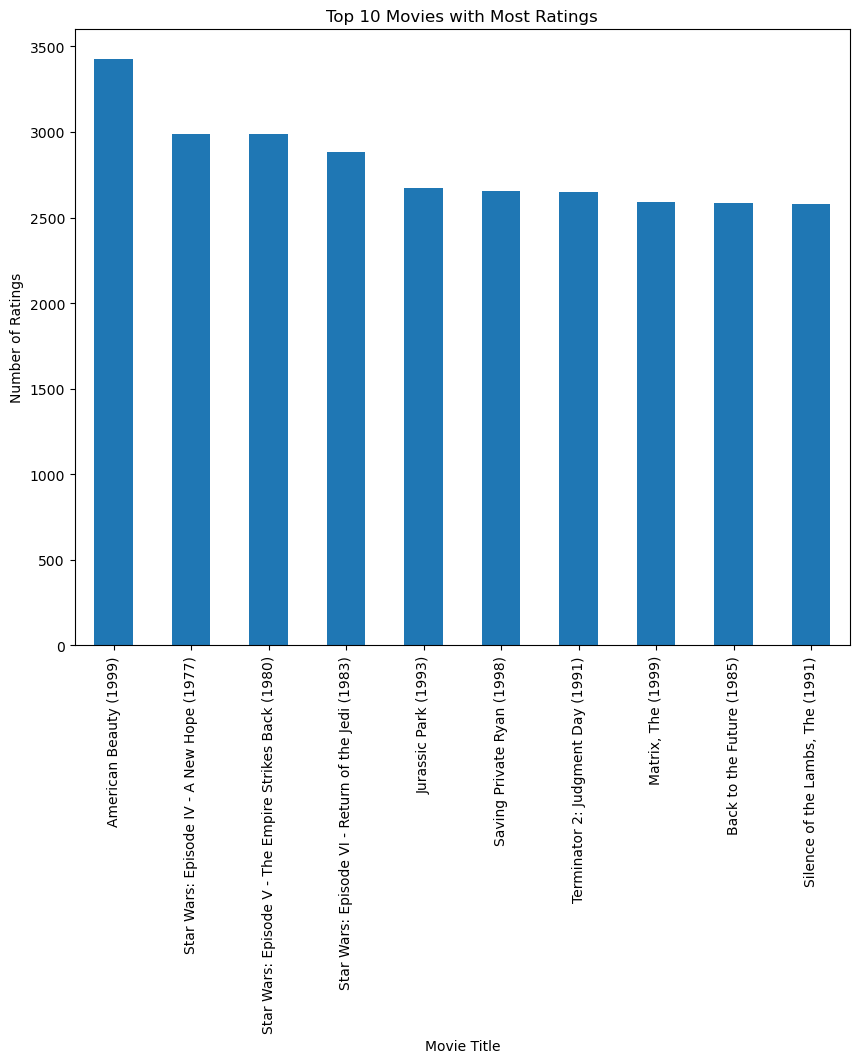

In [14]:
# Calculate the number of ratings per movie
ratings_per_movie = df.groupby('Title')['Rating'].count().sort_values(ascending=False)

# Plot the top 10 movies with the most ratings
plt.figure(figsize=(10, 8))
ratings_per_movie.head(10).plot(kind='bar')
plt.title('Top 10 Movies with Most Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

## Average rating per movie

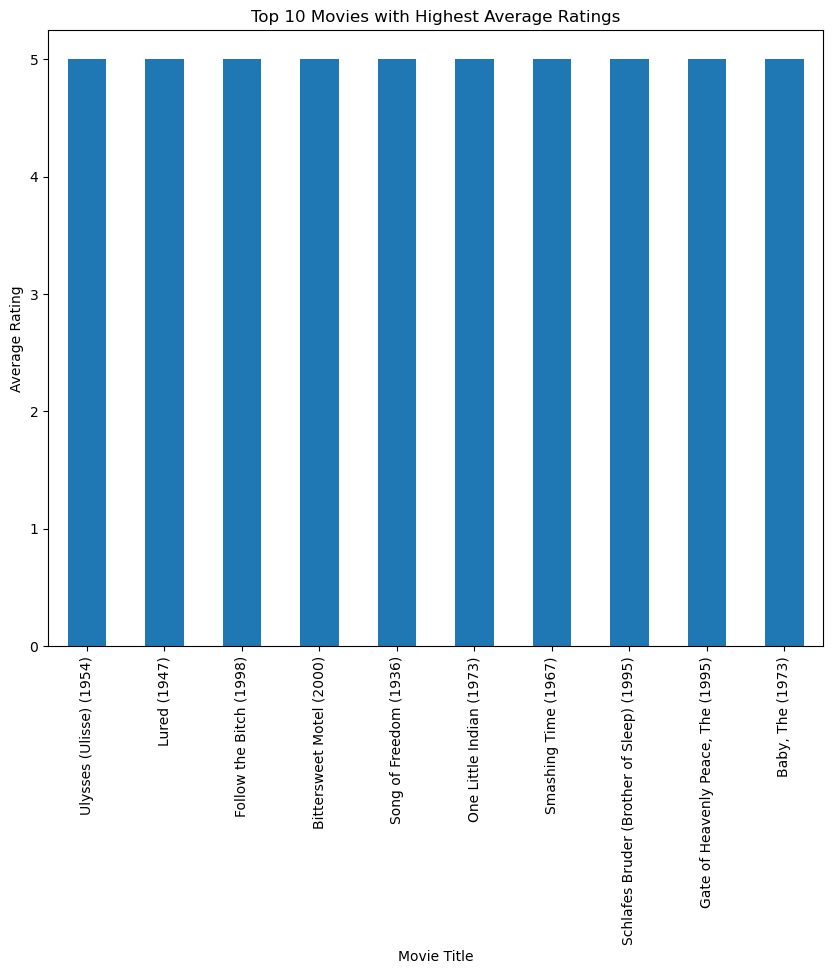

In [16]:
# Calculate the average rating per movie
average_ratings = df.groupby('Title')['Rating'].mean().sort_values(ascending=False)

# Plot the top 10 movies with the highest average ratings
plt.figure(figsize=(10, 8))
average_ratings.head(10).plot(kind='bar')
plt.title('Top 10 Movies with Highest Average Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()